In [23]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

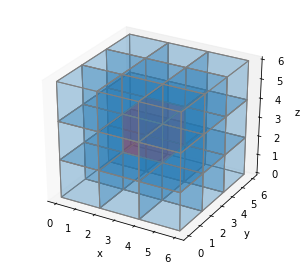

In [37]:
# Voxel plotting with transparency

from mpl_toolkits.mplot3d import Axes3D
def make_ax(grid=False):
    fig = plt.figure(figsize=(5,4.5))
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax

def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

ax = make_ax()
colors = np.array([[['#1f77b430']*3]*3]*3)
colors[1,1,1] = '#ff000040'
colors = explode(colors)
filled = explode(np.ones((3, 3, 3)))
x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))
# ax.voxels(x, y, z, filled, facecolors=colors, edgecolors='gray')
ax.voxels(x, y, z, filled, facecolors=colors, edgecolors='gray')
plt.show()

(-0.5, 359.5, 359.5, -0.5)

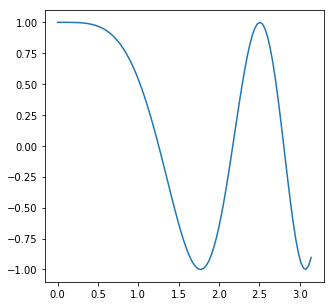

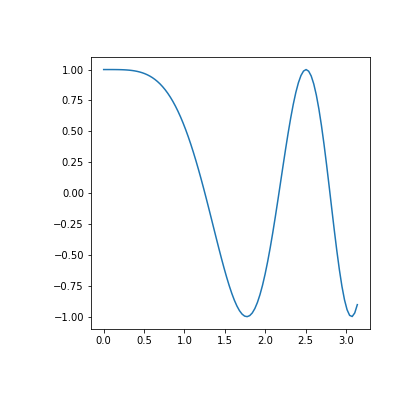

In [77]:
# Saving matplotlib figure to PIL image

fig = plt.figure(figsize=(5,5))
ax = plt.gca()
x = np.linspace(0, np.pi, 100)
ax.plot(x, np.cos(x**2))

fig.canvas.draw()
w, h = fig.canvas.get_width_height()
image = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
image = image.reshape(w, h, -1)

# Roll the ALPHA channel to convert from ARGB => RGBA
image = np.roll(image, 3, axis=2)

# plot the resulting figure
dpi = 100
fig = plt.figure(dpi=dpi)
w, h, _ = image.shape
figsize = (w/dpi, h/dpi)
fig.set_size_inches(*figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(image, cmap='gray', interpolation='none')
plt.axis('off')

(-0.5, 359.5, 359.5, -0.5)

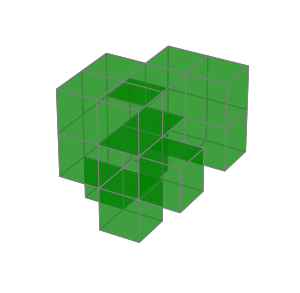

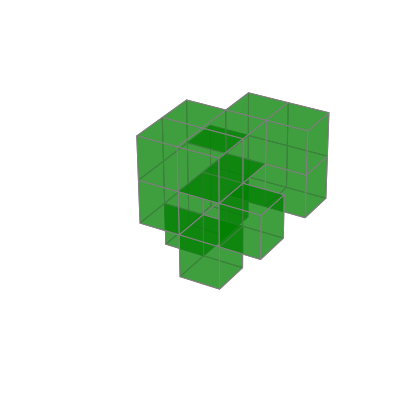

In [92]:
# Saving mplot3d figure to PIL image

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
voxels = np.random.rand(3, 3, 3) < 0.5
ax.voxels(voxels, facecolor='#00800080', edgecolor='gray')
plt.axis('off')

fig.canvas.draw()
w, h = fig.canvas.get_width_height()
image = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
image = image.reshape(w, h, -1)

# Roll the ALPHA channel to convert from ARGB => RGBA
image = np.roll(image, 3, axis=2)

# plot the resulting figure
dpi = 100
fig = plt.figure(dpi=dpi)
w, h, _ = image.shape
figsize = (w/dpi, h/dpi)
fig.set_size_inches(*figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(image, interpolation='none')
plt.axis('off')